In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read data in google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1BpTzPUw-VzKUWpjX0Tb2eO68LZhaTGbL4FEbuRPlxMY/edit#gid=1903509374'
sheet_url_replace = sheet_url.replace('/edit#gid=','/export?format=csv&gid=')

df = pd.read_csv(sheet_url_replace)
df.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7


# Cleaning Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


In [ ]:
df.columns

Index(['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity'],
      dtype='object')

In [ ]:
df_cleaned = df.copy()

# ubah data 'Date' object -> datetime
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# buat kolom baru -> 'Revenue'
df_cleaned['Revenue'] = df_cleaned['Unit price'] * df_cleaned['Quantity']

print(df_cleaned.info())
df_cleaned.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Payment        1000 non-null   object        
 2   Invoice ID     1000 non-null   object        
 3   Branch         1000 non-null   object        
 4   City           1000 non-null   object        
 5   Customer type  1000 non-null   object        
 6   Gender         1000 non-null   object        
 7   Product line   1000 non-null   object        
 8   Unit price     1000 non-null   float64       
 9   Quantity       1000 non-null   int64         
 10  Revenue        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 86.1+ KB
None


,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
995,2019-01-29,Ewallet,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,40.35
996,2019-03-02,Ewallet,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,973.80
997,2019-02-09,Cash,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,31.84
998,2019-02-22,Cash,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,65.82
999,2019-02-18,Cash,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,618.38


In [ ]:
# check value typo kolom 'Gender'

df_cleaned['Gender'].value_counts()

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64

In [ ]:
for col in ['Payment', 'Branch', 'City', 'Customer type','Gender', 'Product line'] :
  print(df_cleaned[col].value_counts(), '\n')

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 



In [ ]:
# replace

dict_typo = {'male' : 'Male',
             'female' : 'Female',
             'fml' : 'Female'}

df_cleaned = df_cleaned.replace(dict_typo)
df_cleaned.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


In [ ]:
df_cleaned['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [ ]:
# memeriksa data duplikat

df_cleaned['Invoice ID'].duplicated().sum()

0

# Exploratory Data Analysis

## Daily Trend

In [ ]:
# daily trend

agg_daily = df_cleaned.groupby('Date', as_index=False)['Revenue', 'Quantity'].sum()
agg_daily.head()

<ipython-input-27-74aa25c05046>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_daily = df_cleaned.groupby('Date', as_index=False)['Revenue', 'Quantity'].sum()


,Date,Revenue,Quantity
0,2019-01-01,4519.22,81
1,2019-01-02,1852.86,48
2,2019-01-03,1979.17,37
3,2019-01-04,1546.37,32
4,2019-01-05,3368.27,55


<function matplotlib.pyplot.show(close=None, block=None)>

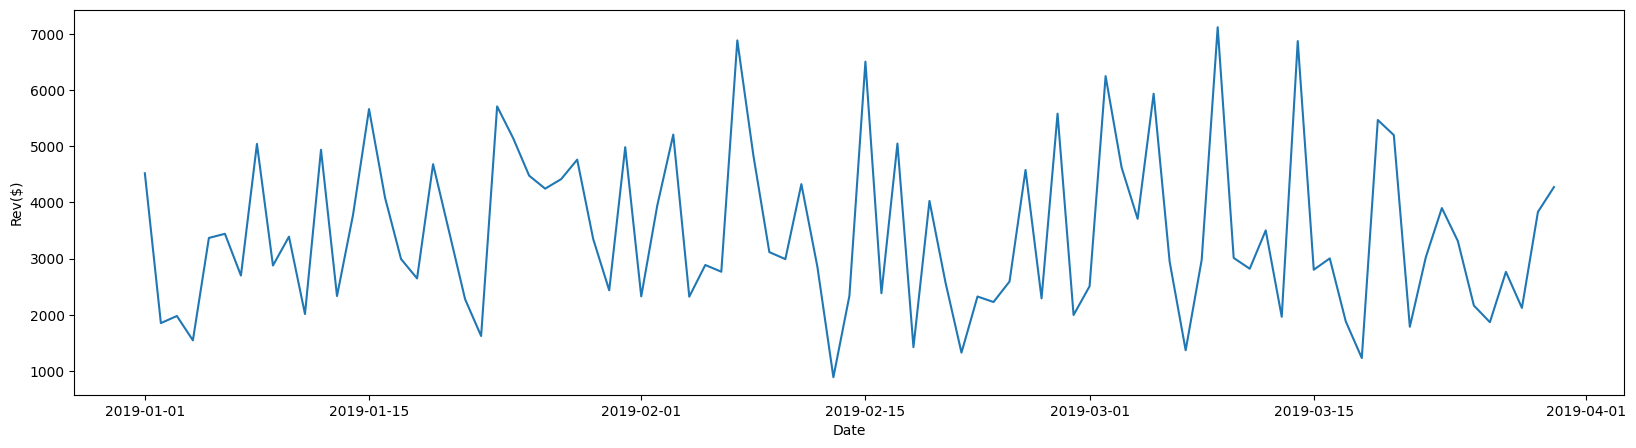

In [ ]:
plt.rcParams["figure.figsize"] = (20, 5)
plt.plot('Date', 'Revenue', data=agg_daily)
plt.xlabel('Date')
plt.ylabel('Rev($)')
plt.show

Revenue of our data has seasonality

<Axes: xlabel='Date', ylabel='Quantity'>

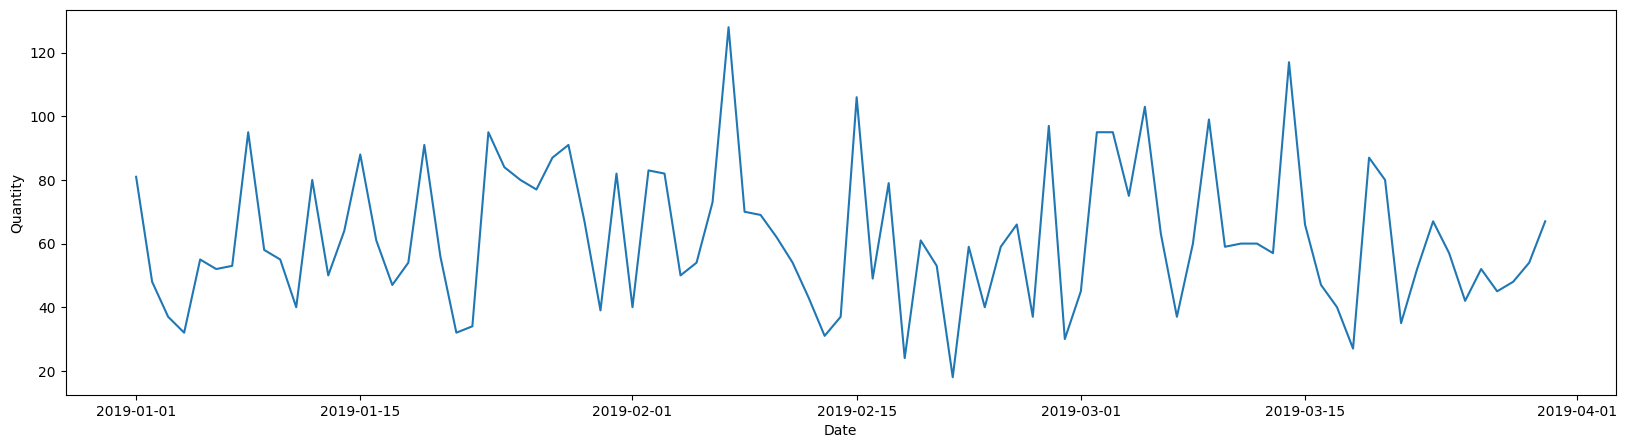

In [ ]:
sns.lineplot(data = agg_daily, x='Date', y='Quantity')

## By Payment

In [ ]:
agg_payment = df_cleaned.groupby('Payment', as_index=False).agg({'Revenue':'sum','Invoice ID':'nunique'})
agg_payment.head()

,Payment,Revenue,Invoice ID
0,Cash,106863.40,344
1,Credit card,95968.64,311
2,Ewallet,104755.34,345


from matplotlib import pyplot as plt
_df_8['Revenue'].plot(kind='hist', bins=20, title='Revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Invoice ID'].plot(kind='hist', bins=20, title='Invoice ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('Payment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Revenue', y='Invoice ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Revenue'].plot(kind='line', figsize=(8, 4), title='Revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Invoice ID'].plot(kind='line', figsize=(8, 4), title='Invoice ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Payment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Revenue', y='Payment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Payment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Invoice ID', y='Payment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='Payment', ylabel='Revenue'>

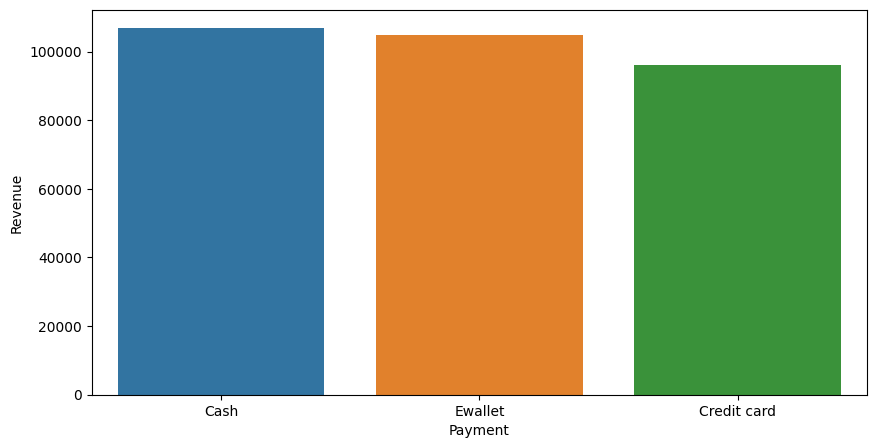

In [ ]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.barplot(x = 'Payment', y = 'Revenue', data = agg_payment.sort_values('Revenue', ascending=False))

Highest revenue came from Cash Payment

<Axes: xlabel='Payment', ylabel='Invoice ID'>

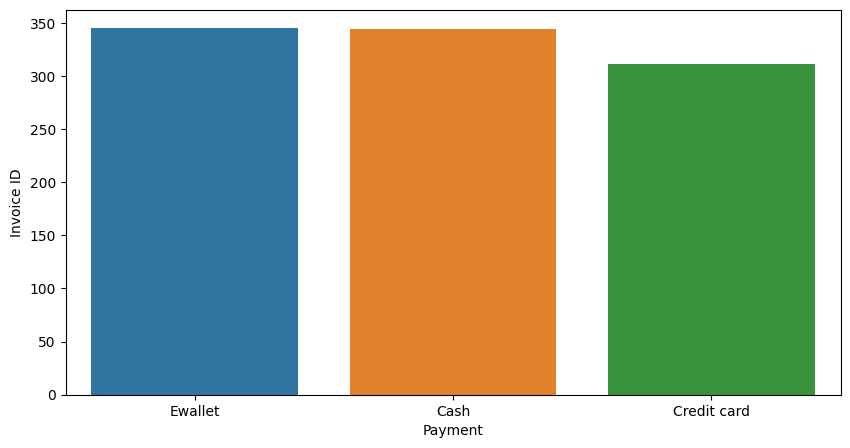

In [ ]:
sns.barplot(x = 'Payment', y = 'Invoice ID', data = agg_payment.sort_values('Invoice ID', ascending=False))

Transaction Count (Invoice ID) happen with E-Wallet Payment

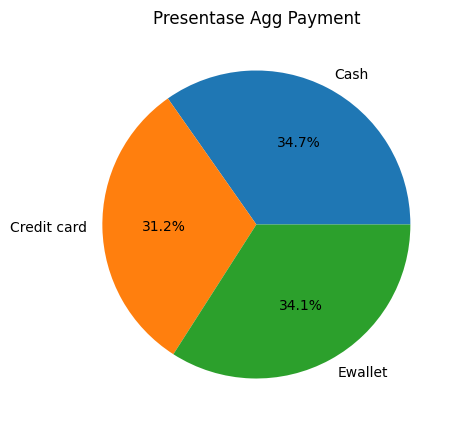

In [ ]:
# Plotting
plt.pie(agg_payment['Revenue'],labels = agg_payment['Payment'], autopct='%1.1f%%')
plt.title('Presentase Agg Payment')
plt.show()

Cash volume 34.7% dan itu diatas 3.5% dari Credit Card

## By Gender and By Product Type

In [ ]:
agg_gend = df_cleaned.groupby(['Gender','Product line'], as_index=False)['Invoice ID'].nunique()
agg_gend.head()

,Gender,Product line,Invoice ID
0,Female,Electronic accessories,84
1,Female,Fashion accessories,96
2,Female,Food and beverages,90
3,Female,Health and beauty,64
4,Female,Home and lifestyle,79


<Axes: xlabel='Product line', ylabel='Invoice ID'>

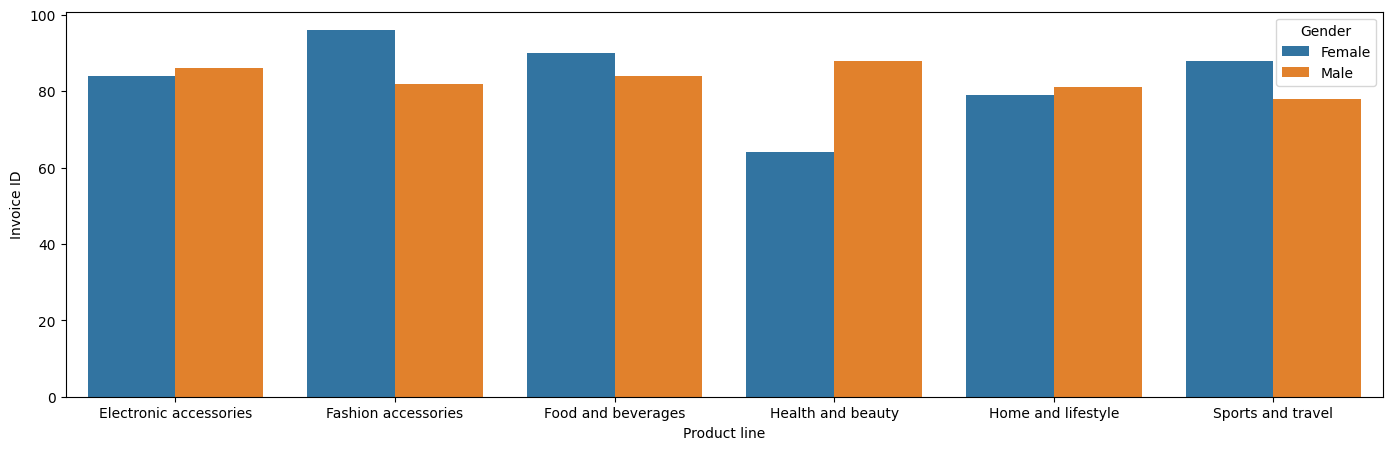

In [ ]:
plt.rcParams["figure.figsize"] = (17, 5)

sns.barplot(x = 'Product line', y = 'Invoice ID', data = agg_gend, hue = 'Gender')

Fashion acc dominated by Female buyers.